# Mashinsko Ucenje - LAB3

## 151027, Fisnik Limani

### DATASET: MICE PROTEIN EXPRESSION DATA SET
- http://archive.ics.uci.edu/ml/datasets/Mice+Protein+Expression
  
  
    
DATASET INFORMATION  
- Attributes: Real
- Number of instances: 1080
- Number of attributes 82 (77)
    - Expression of 77 proteins/protein modifications 38 control mice, 34 trisomic mice (down syndrome) 15 measurements were registered of each protein per sample/mouse
    - Attribute Columns:
        - Mouse ID  
        - 2...78. Values of expression levels of 77 proteins  
        - Genotype: control (c) or trisomy (t)  
        - Behavior: context-shock (CS) or shock-context (SC)  
        - Class    
      
- Classes (8):
    - c-CS-s: control mice, stimulated to learn, injected with saline (9 mice)
    - c-CS-m: control mice, stimulated to learn, injected with memantine (10 mice)
    - c-SC-s: control mice, not stimulated to learn, injected with saline (9 mice)
    - c-SC-m: control mice, not stimulated to learn, injected with memantine (10 mice)

    - t-CS-s: trisomy mice, stimulated to learn, injected with saline (7 mice)
    - t-CS-m: trisomy mice, stimulated to learn, injected with memantine (9 mice)
    - t-SC-s: trisomy mice, not stimulated to learn, injected with saline (9 mice)
    - t-SC-m: trisomy mice, not stimulated to learn, injected with memantine (9 mice)

# 1. IMPORT LIBRARIES

In [346]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px


from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN


from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import plotly.io as pio
pio.renderers.default = 'notebook'

# 2. READING DATASETS

In [347]:
file = r'data/Data_Cortex_Nuclear.xls'
df = pd.read_excel(file)
df.head()

MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0   309_1  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830   
1   309_2  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636   
2   309_3  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011   
3   309_4  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886   
4   309_5  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106   

    pBRAF_N  pCAMKII_N   pCREB_N  ...   pCFOS_N     SYP_N  H3AcK18_N  \
0  0.177565   2.373744  0.232224  ...  0.108336  0.427099   0.114783   
1  0.172817   2.292150  0.226972  ...  0.104315  0.441581   0.111974   
2  0.175722   2.283337  0.230247  ...  0.106219  0.435777   0.111883   
3  0.176463   2.152301  0.207004  ...  0.111262  0.391691   0.130405   
4  0.173627   2.134014  0.192158  ...  0.110694  0.434154   0.118481   

     EGR1_N  H3MeK4_N    CaNA_N  Genotype  Treatment  Behavior   class  
0  0.131790  0.128186  1.675652   Control  Memantine       C/S  c-CS-m  
1  0.135103  0.131119  1.743610   Control  Memantine       C/S  c-CS-m  
2  0.133362  0.127431  1.926427   Control  Memantine       C/S  c-CS-m  
3  0.147444  0.146901  1.700563   Control  Memantine       C/S  c-CS-m  
4  0.140314  0.148380  1.839730   Control  Memantine       C/S  c-CS-m  

[5 rows x 82 columns]

In [348]:
df.shape

(1080, 82)

## 2.1. REMOVE UNNECESSARY COLUMNS

In [349]:
df = df.drop([df.columns[0], df.columns[-2], df.columns[-3], df.columns[-4]], axis = 1)
df.shape

(1080, 78)

# 3. ЗАПОЗНАВАЊЕ СО DATASET-от

In [350]:
df.describe()

DYRK1A_N      ITSN1_N       BDNF_N        NR1_N       NR2A_N  \
count  1077.000000  1077.000000  1077.000000  1077.000000  1077.000000   
mean      0.425810     0.617102     0.319088     2.297269     3.843934   
std       0.249362     0.251640     0.049383     0.347293     0.933100   
min       0.145327     0.245359     0.115181     1.330831     1.737540   
25%       0.288121     0.473361     0.287444     2.057411     3.155678   
50%       0.366378     0.565782     0.316564     2.296546     3.760855   
75%       0.487711     0.698032     0.348197     2.528481     4.440011   
max       2.516367     2.602662     0.497160     3.757641     8.482553   

            pAKT_N      pBRAF_N    pCAMKII_N      pCREB_N       pELK_N  ...  \
count  1077.000000  1077.000000  1077.000000  1077.000000  1077.000000  ...   
mean      0.233168     0.181846     3.537109     0.212574     1.428682  ...   
std       0.041634     0.027042     1.295169     0.032587     0.466904  ...   
min       0.063236     0.064043     1.343998     0.112812     0.429032  ...   
25%       0.205755     0.164595     2.479834     0.190823     1.203665  ...   
50%       0.231177     0.182302     3.326520     0.210594     1.355846  ...   
75%       0.257261     0.197418     4.481940     0.234595     1.561316  ...   
max       0.539050     0.317066     7.464070     0.306247     6.113347  ...   

             SHH_N       BAD_N      BCL2_N        pS6_N      pCFOS_N  \
count  1080.000000  867.000000  795.000000  1080.000000  1005.000000   
mean      0.226676    0.157914    0.134762     0.121521     0.131053   
std       0.028989    0.029537    0.027417     0.014276     0.023863   
min       0.155869    0.088305    0.080657     0.067254     0.085419   
25%       0.206395    0.136424    0.115554     0.110839     0.113506   
50%       0.224000    0.152313    0.129468     0.121626     0.126523   
75%       0.241655    0.174017    0.148235     0.131955     0.143652   
max       0.358289    0.282016    0.261506     0.158748     0.256529   

             SYP_N   H3AcK18_N      EGR1_N    H3MeK4_N       CaNA_N  
count  1080.000000  900.000000  870.000000  810.000000  1080.000000  
mean      0.446073    0.169609    0.183135    0.205440     1.337784  
std       0.066432    0.059402    0.040406    0.055514     0.317126  
min       0.258626    0.079691    0.105537    0.101787     0.586479  
25%       0.398082    0.125848    0.155121    0.165143     1.081423  
50%       0.448459    0.158240    0.174935    0.193994     1.317441  
75%       0.490773    0.197876    0.204542    0.235215     1.585824  
max       0.759588    0.479763    0.360692    0.413903     2.129791  

[8 rows x 77 columns]

In [351]:
df.isnull().sum()

DYRK1A_N             3
ITSN1_N              3
BDNF_N               3
NR1_N                3
NR2A_N               3
pAKT_N               3
pBRAF_N              3
pCAMKII_N            3
pCREB_N              3
pELK_N               3
pERK_N               3
pJNK_N               3
PKCA_N               3
pMEK_N               3
pNR1_N               3
pNR2A_N              3
pNR2B_N              3
pPKCAB_N             3
pRSK_N               3
AKT_N                3
BRAF_N               3
CAMKII_N             3
CREB_N               3
ELK_N               18
ERK_N                3
GSK3B_N              3
JNK_N                3
MEK_N                7
TRKA_N               3
RSK_N                3
                  ... 
S6_N                 0
ADARB1_N             0
AcetylH3K9_N         0
RRP1_N               0
BAX_N                0
ARC_N                0
ERBB4_N              0
nNOS_N               0
Tau_N                0
GFAP_N               0
GluR3_N              0
GluR4_N              0
IL1B_N     

In [352]:
df.isnull().sum(axis = 1)

0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
       ..
1050    2
1051    2
1052    2
1053    2
1054    2
1055    2
1056    2
1057    2
1058    2
1059    2
1060    2
1061    2
1062    2
1063    2
1064    2
1065    1
1066    1
1067    1
1068    1
1069    1
1070    1
1071    1
1072    1
1073    1
1074    1
1075    1
1076    1
1077    1
1078    1
1079    1
Length: 1080, dtype: int64

In [353]:
df = df.dropna(how = 'any', thresh = 70)
df.shape

(1077, 78)

In [354]:
df = df.fillna(df.mean())

In [355]:
df.isnull().sum(axis = 1)

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
1050    0
1051    0
1052    0
1053    0
1054    0
1055    0
1056    0
1057    0
1058    0
1059    0
1060    0
1061    0
1062    0
1063    0
1064    0
1065    0
1066    0
1067    0
1068    0
1069    0
1070    0
1071    0
1072    0
1073    0
1074    0
1075    0
1076    0
1077    0
1078    0
1079    0
Length: 1077, dtype: int64

## 3.1. ВИЗУЕЛИЗАЦИЈА

### 3.1.1. 2D PCA

In [356]:
scaler = StandardScaler()
data = df.loc[:, 'DYRK1A_N':'CaNA_N']
scaler.fit(data)

data_scaled = scaler.transform(data)
data_scaled

array([[ 0.3122765 ,  0.51721375,  2.25053663, ..., -1.41502533,
        -1.60539946,  1.06572921],
       [ 0.35630203,  0.28610313,  1.87766618, ..., -1.32372335,
        -1.54442687,  1.27986809],
       [ 0.33450033,  0.44983853,  2.01012995, ..., -1.37170779,
        -1.62108442,  1.8559389 ],
       ...,
       [-0.79082704, -0.88231473, -1.72143376, ...,  1.26932501,
         3.11399781,  0.29425871],
       [-0.82074584, -0.81188383, -1.52175774, ...,  1.87902795,
         3.32478867,  0.20982934],
       [-0.49422802, -0.62039129, -1.26669035, ...,  1.9252808 ,
         3.32322624,  0.10574359]])

In [357]:
pca = PCA(n_components = 2)
pca.fit(data_scaled)

data_pca = pca.transform(data_scaled)

print("Original shape: {}".format(str(data_scaled.shape)))
print("Reduced shape: {}".format(str(data_pca.shape)))

Original shape: (1077, 77)
Reduced shape: (1077, 2)


Explained Variance Ratio: 0.4239312098625216


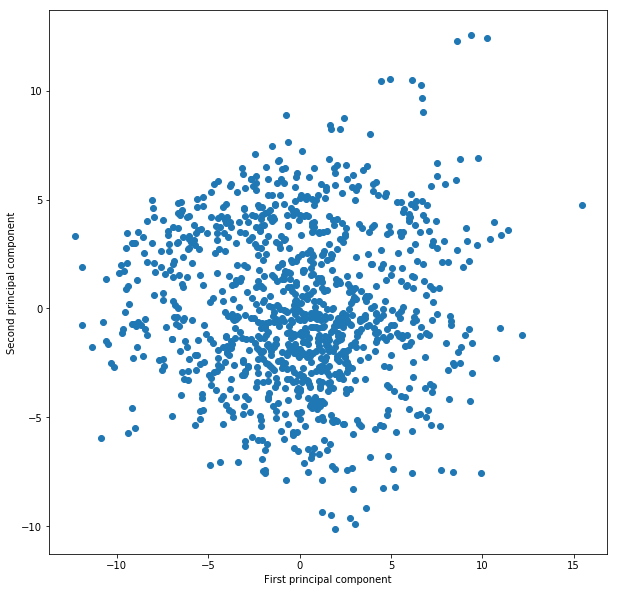

In [358]:
plt.figure(figsize=(10, 10))
plt.scatter(data_pca[:, 0], data_pca[:, 1])

plt.xlabel("First principal component")
plt.ylabel("Second principal component")

print("Explained Variance Ratio:", pca.explained_variance_ratio_.sum())

### 3.1.2. 3D PCA

In [359]:
pca_3d = PCA(n_components = 3)
pca_3d.fit(data_scaled)

data_pca_3d = pca_3d.transform(data_scaled)

print("Original shape: {}".format(str(data_scaled.shape)))
print("Reduced shape: {}".format(str(data_pca_3d.shape)))

Original shape: (1077, 77)
Reduced shape: (1077, 3)


In [360]:
dictionary = {
    'First Principal Component': data_pca_3d[:, 0], 
    'Second Principal Component': data_pca_3d[:, 1], 
    'Third Principal Component': data_pca_3d[:, 2]
}
df_pca = pd.DataFrame(dictionary)

fig = px.scatter_3d(df_pca, x='First Principal Component', y='Second Principal Component', z='Third Principal Component')
fig.show()

print("Explained Variance Ratio:", pca_3d.explained_variance_ratio_.sum())

Explained Variance Ratio: 0.5275050223065534


### 3.1.3. 2D t-SNE

In [361]:
tsne = TSNE(random_state = 42)
# tsne has no transform method, fit_transform is used instead
data_tsne = tsne.fit_transform(data_scaled)

In [362]:
print("Original shape: {}".format(str(data_scaled.shape)))
print("Reduced shape: {}".format(str(data_tsne.shape)))

Original shape: (1077, 77)
Reduced shape: (1077, 2)


Text(0, 0.5, 't-SNE feature 1')

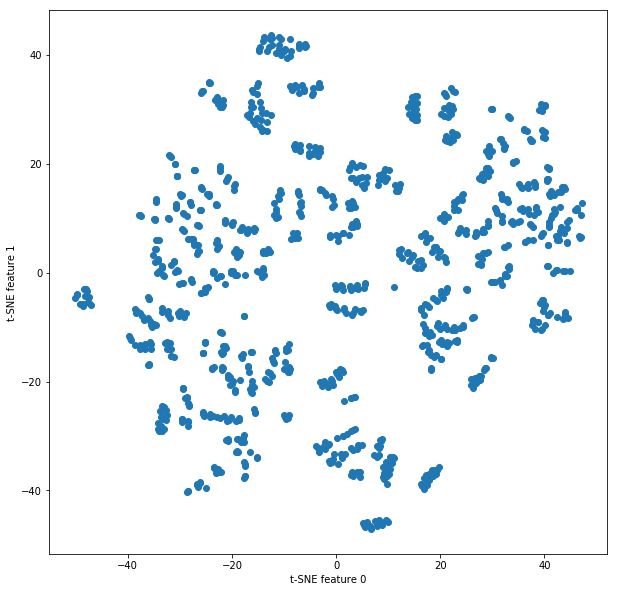

In [363]:
plt.figure(figsize = (10, 10))

plt.scatter(data_tsne[:, 0], data_tsne[:, 1])

plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")

### 3.1.4. 3D t-SNE

In [364]:
tsne_3d = TSNE(n_components= 3, random_state = 42)
# tsne has no transform method, fit_transform is used instead
data_tsne_3d = tsne_3d.fit_transform(data_scaled)

In [365]:
print("Original shape: {}".format(str(data_scaled.shape)))
print("Reduced shape: {}".format(str(data_tsne_3d.shape)))

Original shape: (1077, 77)
Reduced shape: (1077, 3)


In [366]:
dictionary = {
    't-SNE feature 0':  data_tsne_3d[:, 0], 
    't-SNE feature 1':  data_tsne_3d[:, 1], 
    't-SNE feature 2':  data_tsne_3d[:, 2]
}

df_tsne = pd.DataFrame(dictionary)

fig = px.scatter_3d(df_tsne, x='t-SNE feature 0', y='t-SNE feature 1', z='t-SNE feature 2')
fig.show()

# 4. SCREE PLOT

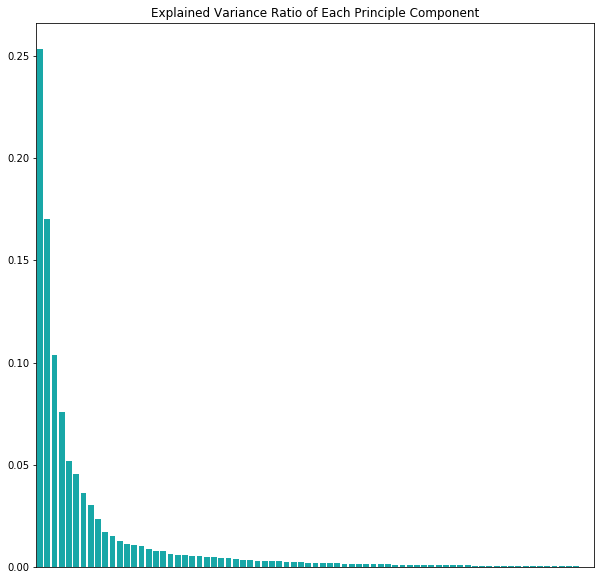

In [367]:
pca = PCA(n_components = None)
pca.fit(data_scaled)
data_new = pca.transform(data_scaled)
plt.figure(figsize = (10,10))
sns.barplot(x = np.arange(data_scaled.shape[1]), y = pca.explained_variance_ratio_, color = "c")
plt.xticks([])
plt.title("Explained Variance Ratio of Each Principle Component")
plt.show()

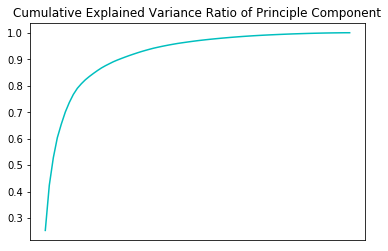

Cumulative variance of 80% reached at component 9


In [368]:
plt.figure()
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(np.arange(data_scaled.shape[1]), cumulative_explained_variance, color = "c")
plt.xticks([])
plt.title("Cumulative Explained Variance Ratio of Principle Component")
plt.show()
res = list(map(lambda i: i > 0.8, cumulative_explained_variance)).index(True)
print("Cumulative variance of 80% reached at component", res)

In [369]:
pca_9d = PCA(n_components = 9)
pca_9d.fit(data_scaled)

data_pca_9d = pca_9d.transform(data_scaled)

print("Original shape: {}".format(str(data_scaled.shape)))
print("Reduced shape: {}".format(str(data_pca_9d.shape)))

Original shape: (1077, 77)
Reduced shape: (1077, 9)


# 5. CLUSTERING

In [370]:
X = data_pca_9d
# y = df['class'].to_numpy()

## 5.1. K-MEANS

### 5.1.1. K-MEANS WITH RANDOM INITIALIZATION

In [371]:
kmeans = KMeans(init = 'random', n_clusters = 8)
kmeans.fit(X)
y_pred = kmeans.predict(X)

In [372]:
tsne = TSNE(random_state = 42)
# tsne has no transform method, fit_transform is used instead
data_tsne = tsne.fit_transform(X)

Text(0, 0.5, 't-SNE feature 1')

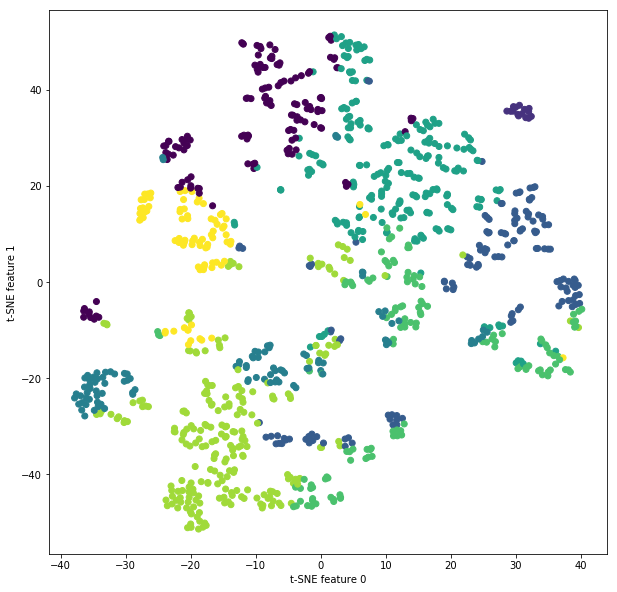

In [373]:
plt.figure(figsize = (10, 10))

plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c = y_pred)

plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")

### 5.1.2. K-MEANS WITH K-MEANS++ INITIALIZATION

In [374]:
kmeans = KMeans(init = 'k-means++', n_clusters = 8, random_state = 0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

In [375]:
tsne = TSNE(random_state = 42)
# tsne has no transform method, fit_transform is used instead
data_tsne = tsne.fit_transform(X)

Text(0, 0.5, 't-SNE feature 1')

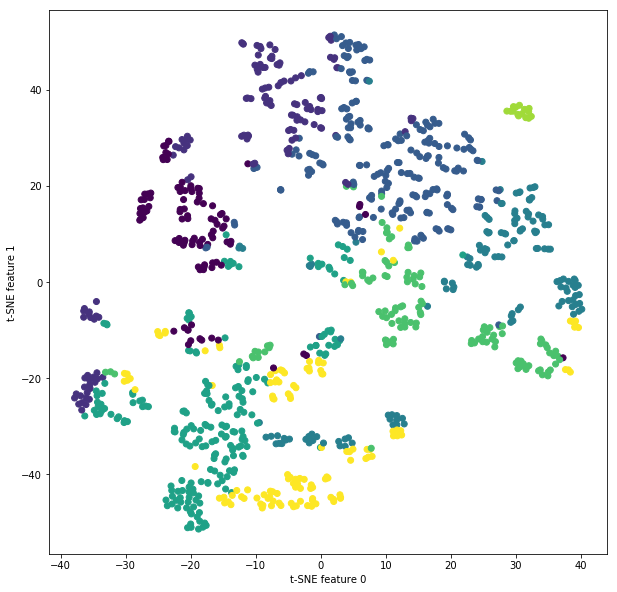

In [376]:
plt.figure(figsize = (10, 10))

plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c = y_pred)

plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")

## 5.2. AGGLOMERATIVE CLUSTERING

### 5.2.1. WARD LINKAGE

In [377]:
hierarchical = AgglomerativeClustering(n_clusters = 8, affinity='euclidean', linkage = 'ward')
y_pred = hierarchical.fit_predict(X)

Text(0, 0.5, 't-SNE feature 1')

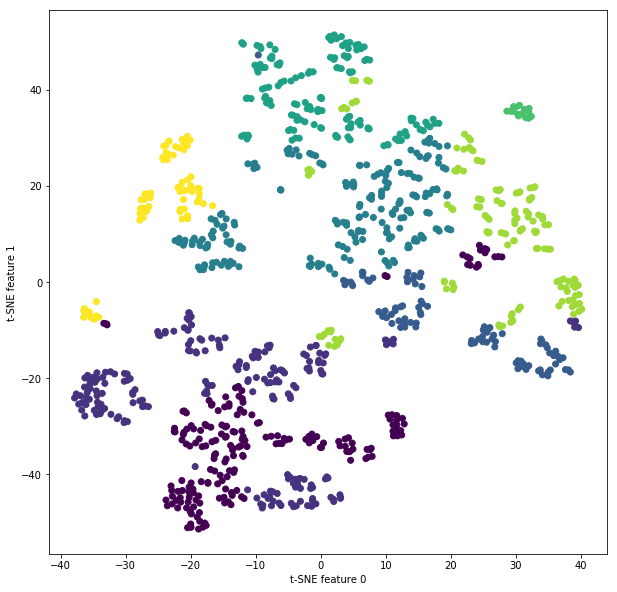

In [378]:
plt.figure(figsize = (10, 10))

plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c = y_pred)

plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")

### 5.2.2. AVERAGE LINKAGE

In [379]:
hierarchical = AgglomerativeClustering(n_clusters = 8, affinity='euclidean', linkage = 'average')
y_pred = hierarchical.fit_predict(X)

Text(0, 0.5, 't-SNE feature 1')

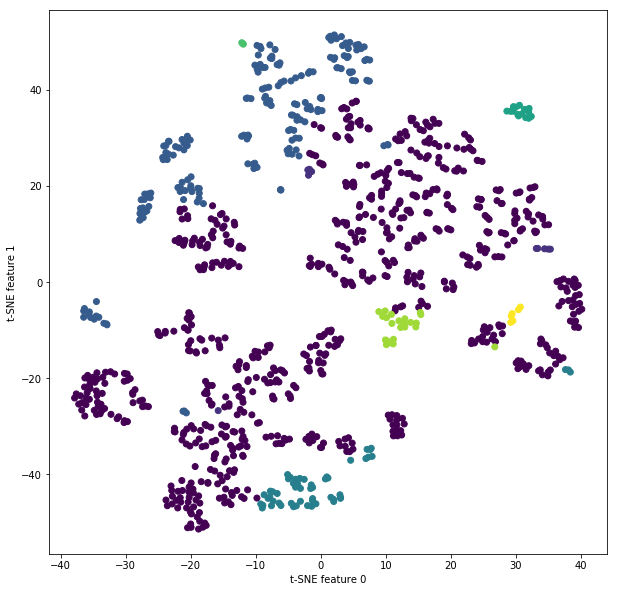

In [380]:
plt.figure(figsize = (10, 10))

plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c = y_pred)

plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")

## 5.3. DBSCAN

### 5.3.1. eps = 0.5, min_samples = 5

In [381]:
dbscan = DBSCAN(eps = 3.9, min_samples = 4)
y_pred = dbscan.fit_predict(X)

len(np.unique(y_pred))

9

Text(0, 0.5, 't-SNE feature 1')

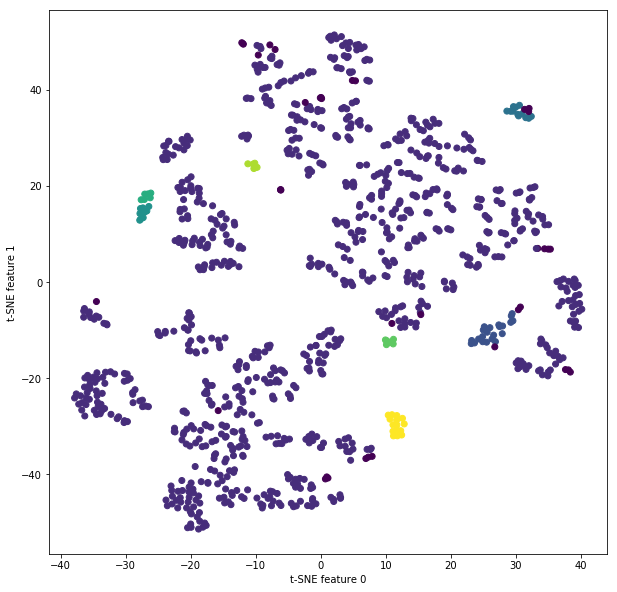

In [382]:
plt.figure(figsize = (10, 10))

plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c = y_pred)

plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")